In [2]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style

In [3]:
statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

In [4]:
def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    state_vector = result.get_statevector()
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)],[i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return state_vector, counts


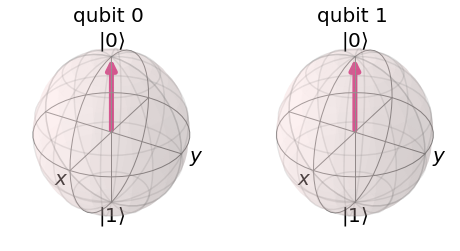

In [15]:
#initialising 
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
#both will be zero

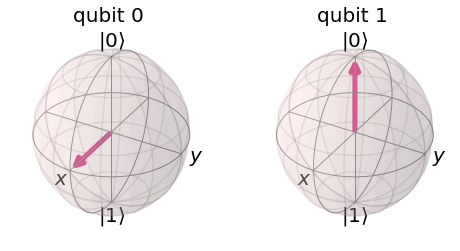

In [16]:
#hadamard gate - this gate puts the qubit on superposition
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

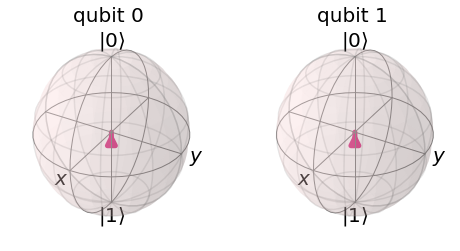

In [17]:
#entagle qubit 0 and 1 with cnot
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
circuit.cx(0,1)  # controlled not control: 0 target: 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

This cnot entanglement, despite having a target on qubit 1, has actually changed qubit 0's vector. 

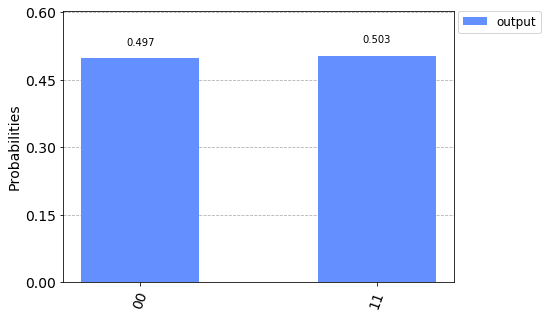

In [18]:
plot_histogram([counts], legend=['output'])


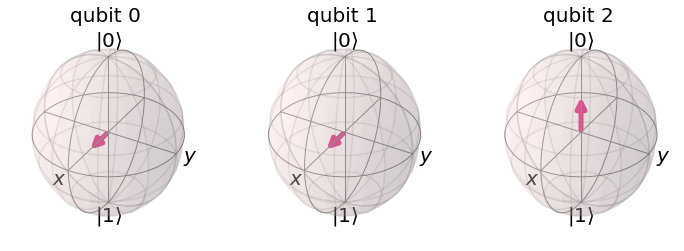

In [20]:
# ccx ontrolled controlled not gate where the target qubit just has 2 control bits, rather than 1.
circuit = q.QuantumCircuit(3,3)  # 3 qubits, 3 classical bits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)


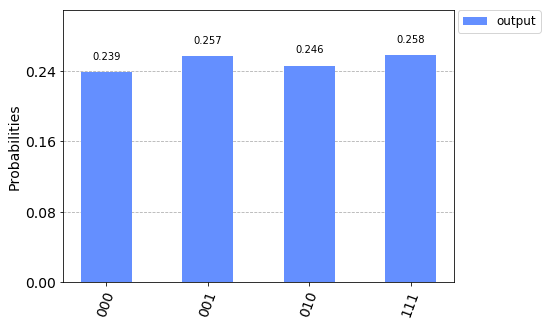

In [21]:
plot_histogram([counts], legend=['output'])


In [22]:
############################

When creating our quantum circuit, we absolutely do not need the same sized registers. We might have 500 qubits, but only care about 1 of those qubits, which we'll map to a classical bit.

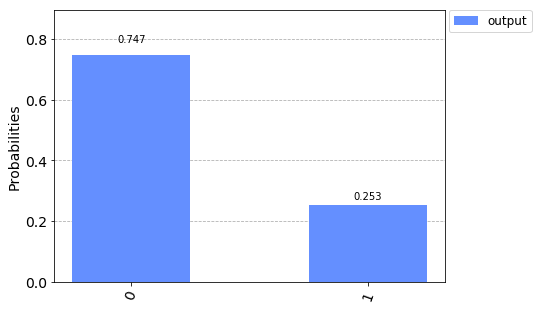

In [28]:
circuit = q.QuantumCircuit(3,1)  # 3 qubits, 1 classical bits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])


If you have qubit 0 with a 50/50 split of being 0 or 1, and then qubit 1 also has a 50/50 chance. This seems like a 50% chance of a 50% chance, so 25% chance sounds correct to me

## Rotations

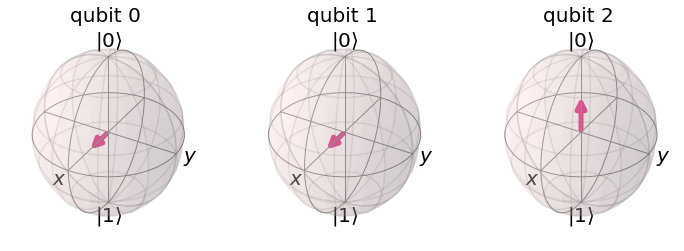

In [5]:
import math
#without rotation
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

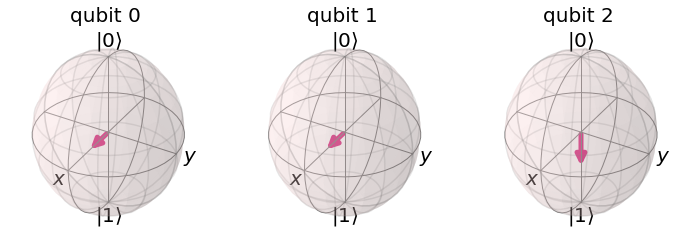

In [6]:
#with rotation
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

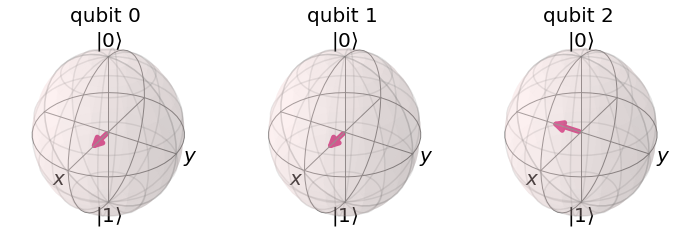

In [7]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

Oh, that's interesting. Looks like we've found ourself a way to entangle this qubit with 2 others, each in a 50/50 state...and yet... is this also not in a 25% state, but actually in a 50/50 state too? Let's see:

In [8]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)
circuit.draw()

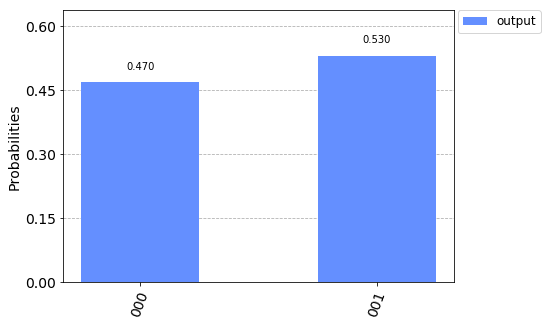

In [9]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

It sure is back in the 50/50 state, despite being controlled by a 50% chance * another 50% chance.

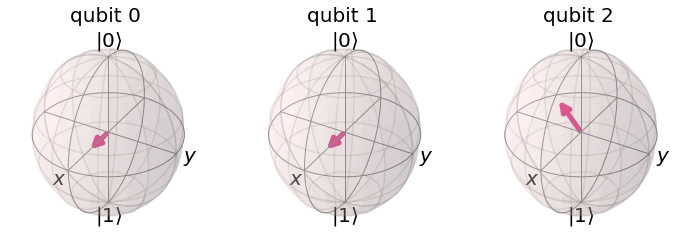

In [10]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

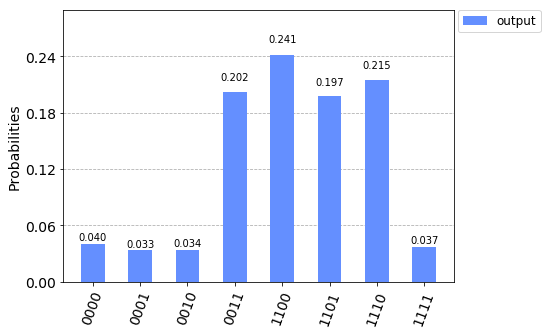

In [13]:
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

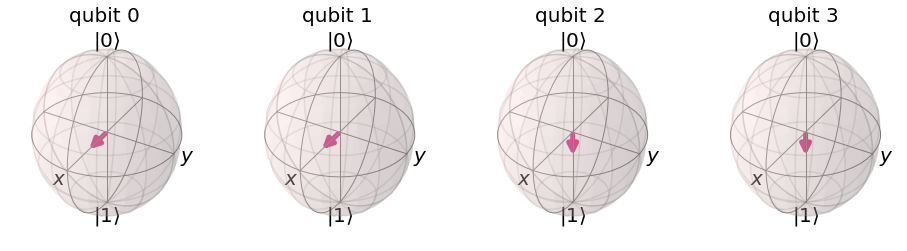

In [12]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

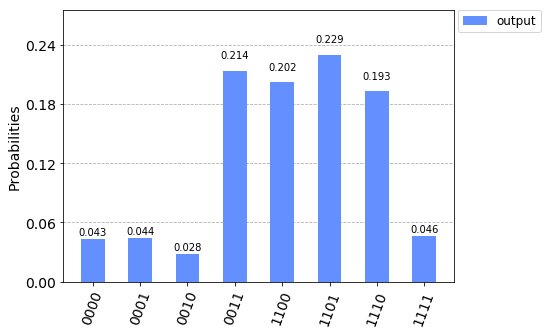

In [14]:
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])